In [6]:
import matplotlib.pyplot as plt
import os

In [27]:
def plotowanie_jednoargumentowe(p, k, funkcja):
    y_axis = []
    x_axis = []
    krok = 0.1
    i = int(p)
    koniec = int(k)
    while i < koniec:
        X1 = i
        if i == 0:  #unikniecie bledu dla "done zad1 fun2 dzi2 0 7.dat"
            X1 = 0.00000001
        y_axis.append(eval(funkcja))
        x_axis.append(i)
        i+=krok
    
    return x_axis, y_axis

def wyznaczenie_przedzialow(nazwa_pliku):
    tabela = nazwa_pliku[:-4].split()
    if tabela[-1] == "pi":
        return -3.14, 3.14
    return tabela[-2], tabela[-1]

def wypisz_funkcje(nazwa_pliku, sciezka_docelowa):
    with open(nazwa_pliku, 'r') as plik:
        zawartosc = plik.read()
    if len(zawartosc)>0:
        poczatek, koniec = wyznaczenie_przedzialow(nazwa_pliku)
        # print(poczatek, koniec, zawartosc)
        x, y = plotowanie_jednoargumentowe(poczatek, koniec, zawartosc)
        plt.grid(True)
        plt.plot(x, y)
        nazwa_obrazka = "img" + nazwa_pliku[nazwa_pliku.rfind("\\")+5:-4] + ".png"
        # print(nazwa_obrazka)
        # if os.path.exists(nazwa_pliku):
        #     print(f"Plik {nazwa_pliku} już istnieje. Nadpisywanie...")
        #     os.remove(nazwa_pliku)
        plt.savefig(sciezka_docelowa+"\\"+nazwa_obrazka)
        plt.show()
        return sciezka_docelowa+"\\"+nazwa_obrazka

def znajdz_pliki_done(folder, pattern):
    pliki_done = []
    folder_done = folder + "\\files\\done"
    folder_img = folder + "\\files\\img"
    print(folder_done)
    print(folder_img)
    for plik in os.listdir(folder_done):
        if plik.startswith(pattern) and not plik.endswith("xmxp2.dat"): #!!!!
            pelna_sciezka = os.path.join(folder_done, plik)
            nazwa = wypisz_funkcje(pelna_sciezka, folder_img)
            print(nazwa)
    return pliki_done

c:\Kuba-dokumenty\Studia\V semestr\Programowanie genetyczne\GeneticProgramming\files\done
c:\Kuba-dokumenty\Studia\V semestr\Programowanie genetyczne\GeneticProgramming\files\img


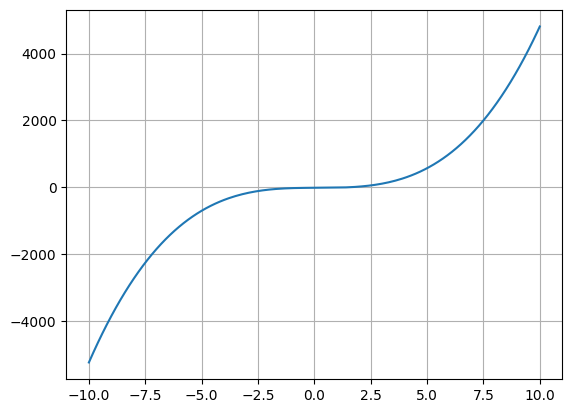

c:\Kuba-dokumenty\Studia\V semestr\Programowanie genetyczne\GeneticProgramming\files\img\img zad1 fun1 dzi1 -10 10.png


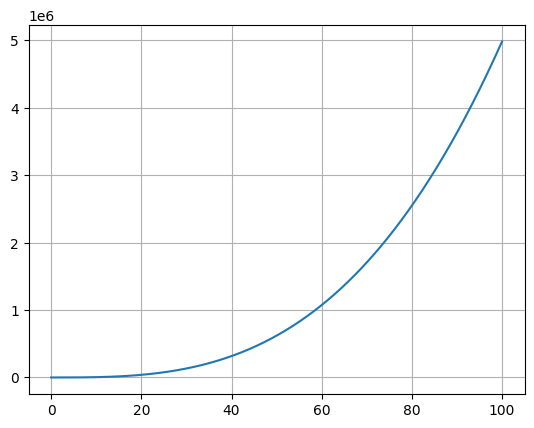

c:\Kuba-dokumenty\Studia\V semestr\Programowanie genetyczne\GeneticProgramming\files\img\img zad1 fun1 dzi2 0 100.png


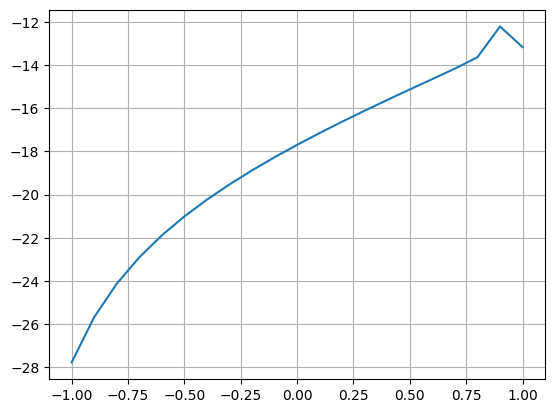

c:\Kuba-dokumenty\Studia\V semestr\Programowanie genetyczne\GeneticProgramming\files\img\img zad1 fun1 dzi3 -1 1.png
None


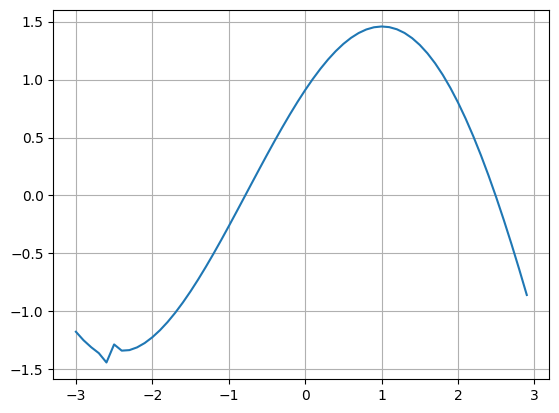

c:\Kuba-dokumenty\Studia\V semestr\Programowanie genetyczne\GeneticProgramming\files\img\img zad1 fun2 dzi1 -pi pi.png


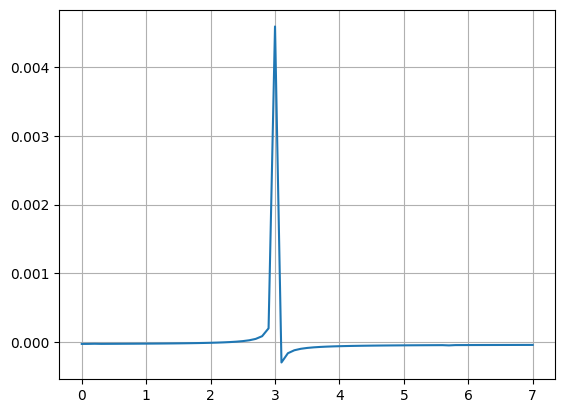

c:\Kuba-dokumenty\Studia\V semestr\Programowanie genetyczne\GeneticProgramming\files\img\img zad1 fun2 dzi2 0 7.png


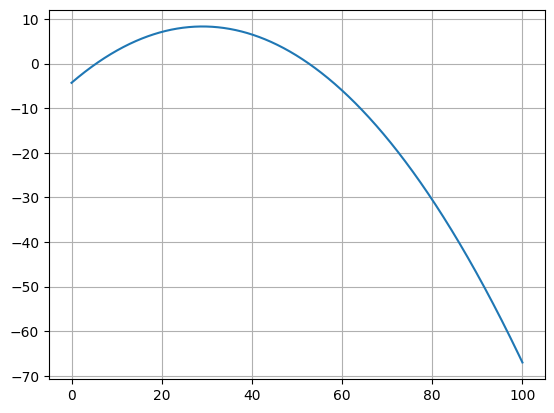

c:\Kuba-dokumenty\Studia\V semestr\Programowanie genetyczne\GeneticProgramming\files\img\img zad1 fun2 dzi3 0 100.png


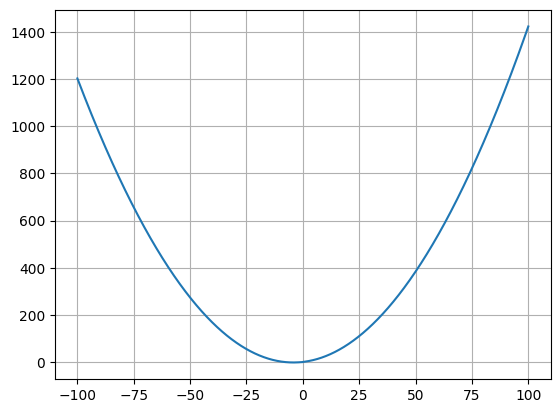

c:\Kuba-dokumenty\Studia\V semestr\Programowanie genetyczne\GeneticProgramming\files\img\img zad1 fun2 dzi4 -100 100.png


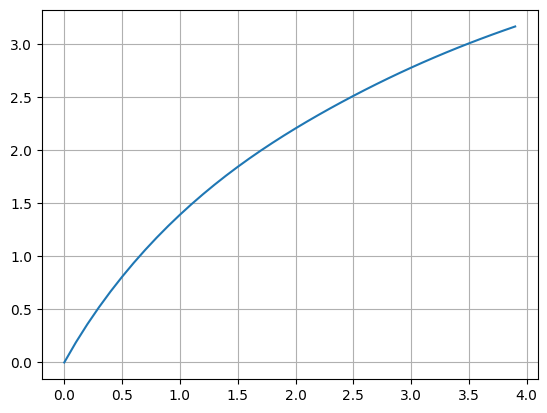

c:\Kuba-dokumenty\Studia\V semestr\Programowanie genetyczne\GeneticProgramming\files\img\img zad1 fun3 dzi1 0 4.png


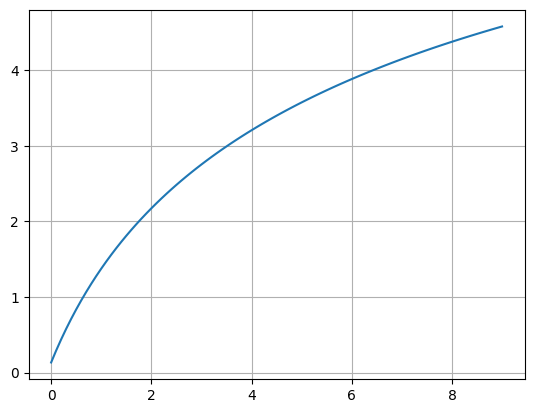

c:\Kuba-dokumenty\Studia\V semestr\Programowanie genetyczne\GeneticProgramming\files\img\img zad1 fun3 dzi2 0 9.png


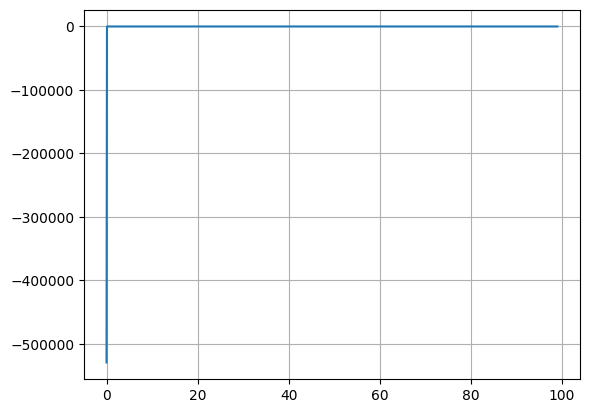

c:\Kuba-dokumenty\Studia\V semestr\Programowanie genetyczne\GeneticProgramming\files\img\img zad1 fun3 dzi3 0 99.png


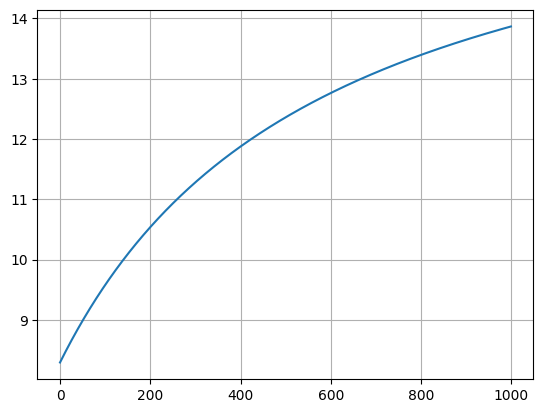

c:\Kuba-dokumenty\Studia\V semestr\Programowanie genetyczne\GeneticProgramming\files\img\img zad1 fun3 dzi4 0 999.png


In [29]:
folder_glowny = os.getcwd() #sciezka do twojego folderu
# print(folder_glowny)
# pliki_done = znajdz_pliki_done(folder_glowny, "done zad1 fun1")
# pliki_done = znajdz_pliki_done(folder_glowny, "done zad1 fun2")
pliki_done = znajdz_pliki_done(folder_glowny, "done")

for plik in pliki_done:
    wypisz_funkcje(plik)